# Weapon usage trends v2

Calculations of weapon usage are based on weapon_kills/all_kills ratio for each player and round [as suggested by Fri](https://discord.com/channels/498800300199772162/977172055361470474/1063083053003583548). With this approach weapons that are getting less kills but more caps (eg m79) are treated more fairly compared to those that are good at getting high kill count (eg mp5, rheinmetall).

In [5]:
import pandas as pd
import seaborn as sns

from s2_analytics.collector.sqlite_collector import SqliteCollector
from s2_analytics.fris_analyzer import FriWeaponUsageCollector
from s2_analytics.importer import import_games

sqlite_collector = SqliteCollector().init()
fri_collector = FriWeaponUsageCollector().init()
import_games("logs_ranked/", period_days=90, processors=[sqlite_collector, fri_collector])
con = sqlite_collector.connection
cur = con.cursor()
pass

## Data summary


In [6]:
query = """
    select
        datetime(min(id)/1000, 'unixepoch') first_game,
        datetime(max(id)/1000, 'unixepoch') last_game,
        count(1) games_count
    from game
"""
pd.read_sql_query(query, con)

,first_game,last_game,games_count
0,2022-10-29 22:18:47,2023-01-21 23:18:15,1139


In [7]:
query = """
    select
        playlistCode,
        count(1) games_count
    from game group by playlistCode
"""
pd.read_sql_query(query, con)

,playlistCode,games_count
0,CTF-Standard-4,68
1,CTF-Standard-6,1064
2,CTF-Standard-8,7


## Primary weapons

Chart data: [csv](data/wu2_ra_21_DeaglesMP5SteyrAUGKalashnikovSpas12M79DragunovBarrettRocketLauncherRheinmetallMinigun.csv)

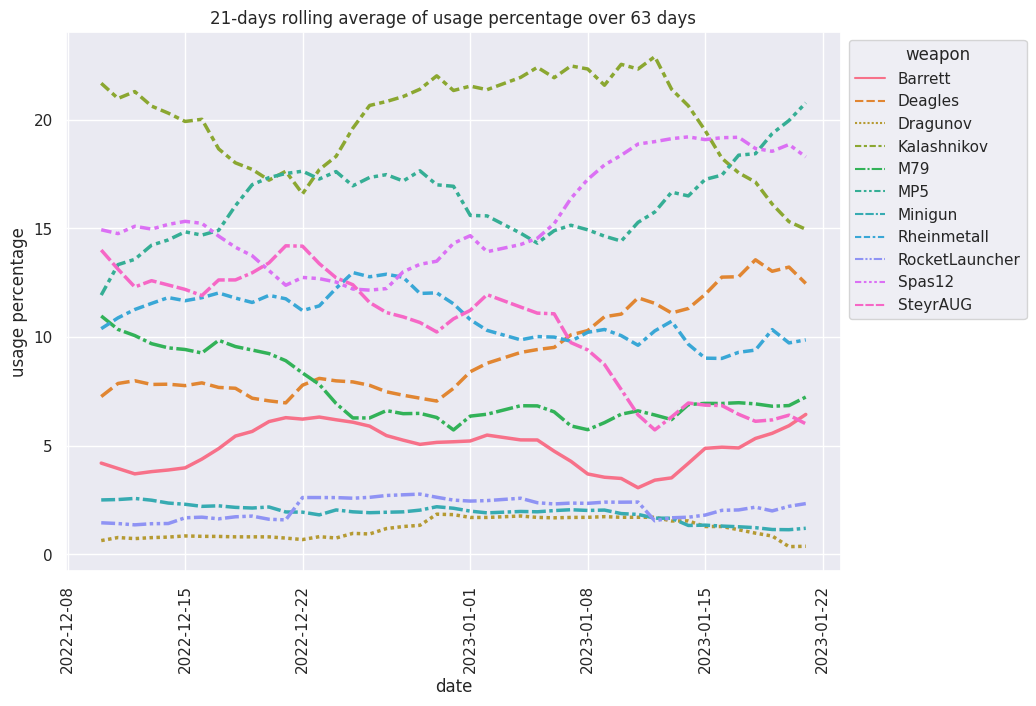

In [8]:
from s2_analytics.tools import dump_csv
from s2_analytics.constants import WEAPONS_SECONDARY, WEAPONS_PRIMARY
from matplotlib.ticker import FixedLocator


def rolling_average_weapons_used(collector: FriWeaponUsageCollector, days: int, weapons_list, chart_height):
    total_period = days * 3
    df = collector.get_data(weapons_list, days)

    def generate_rolling_average_plot(df, days: int, chart_height):
        sns.set(rc={'figure.figsize': (10, chart_height)})
        plt = sns.lineplot(df, x="date", y=f"usage percentage", style="weapon",
                           hue="weapon", linewidth=2.5)
        plt.xaxis.set_major_locator(FixedLocator(plt.get_xticks().tolist()))
        plt.set_xticklabels(plt.get_xticklabels(), rotation=90)
        plt.set_title(f"{days}-days rolling average of usage percentage over {total_period} days")
        sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))
        return plt

    generate_rolling_average_plot(df, days, chart_height=chart_height)
    dump_csv(df, f"wu2_ra_{days}_{''.join(weapons_list)}")


rolling_average_weapons_used(fri_collector, 21, WEAPONS_PRIMARY, chart_height=7)
pass

Chart data: [csv](data/wu2_ra_7_DeaglesMP5SteyrAUGKalashnikovSpas12M79DragunovBarrettRocketLauncherRheinmetallMinigun.csv)

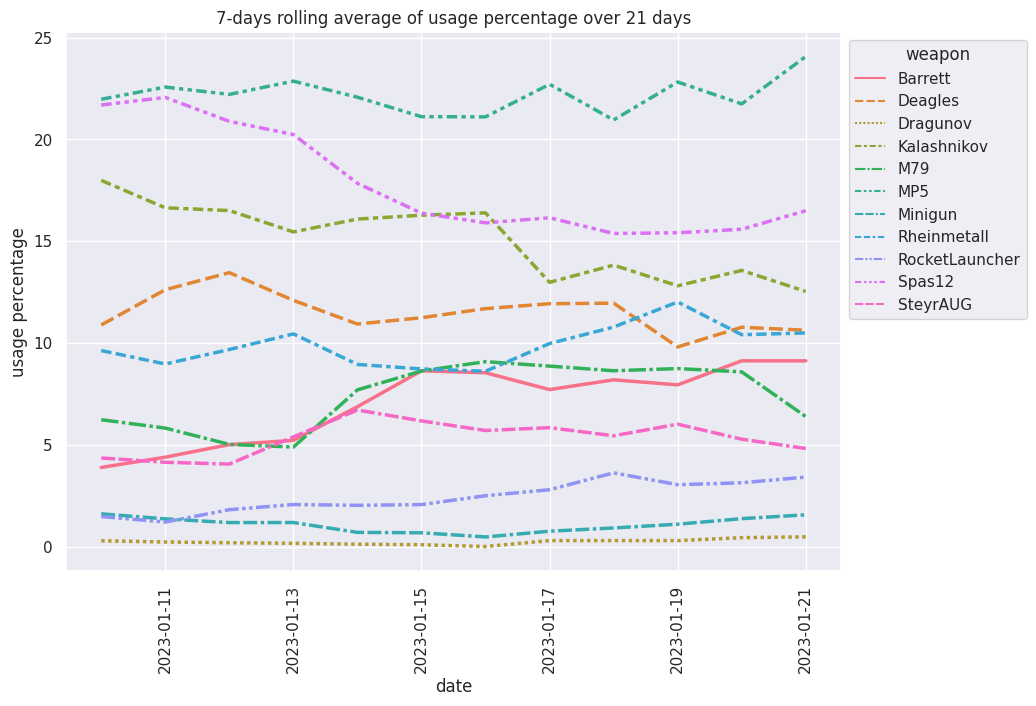

In [9]:
rolling_average_weapons_used(fri_collector, 7, WEAPONS_PRIMARY, chart_height=7)
pass

## Secondary weapons


Chart data: [csv](data/wu2_ra_21_ChainsawKnifeMakarovRPG.csv)

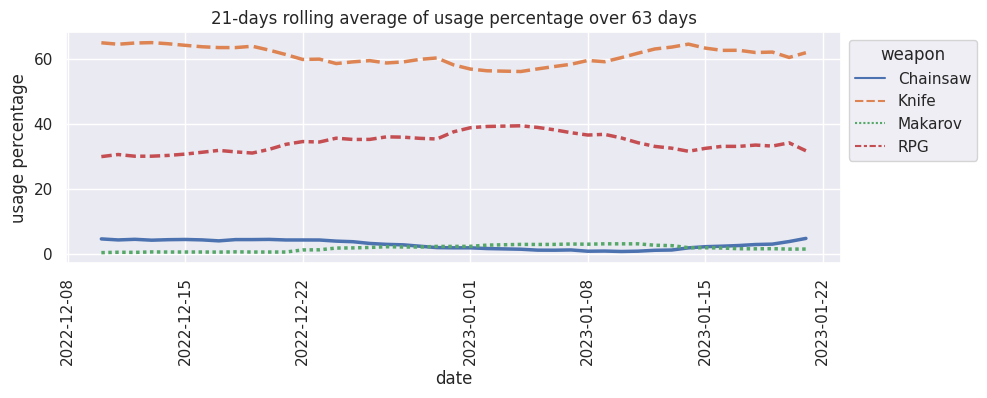

In [10]:
rolling_average_weapons_used(fri_collector, 21, WEAPONS_SECONDARY, chart_height=3)
pass

Chart data: [csv](data/wu2_ra_7_ChainsawKnifeMakarovRPG.csv)

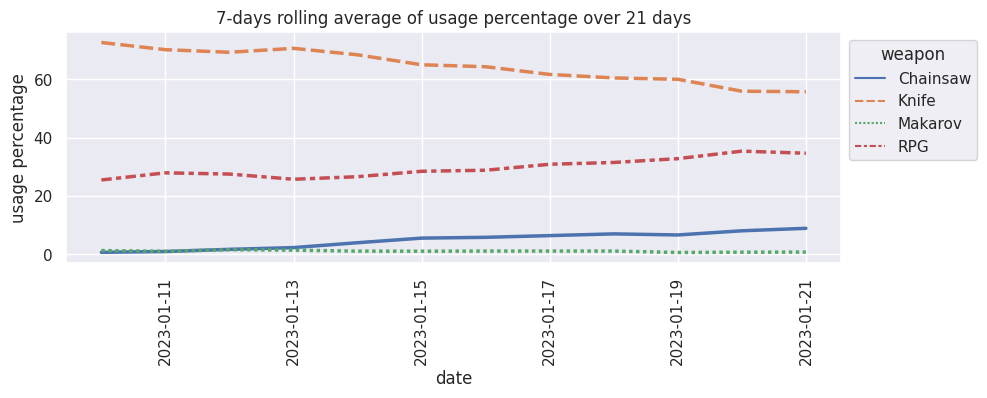

In [11]:
used = rolling_average_weapons_used(fri_collector, 7, WEAPONS_SECONDARY, chart_height=3)
pass